#### Scikit-Learn 맛보기
- Iris 분류 - 결정트리, 서포트벡터머신(svm), 로지스틱 회귀

#### 1. 데이터 전처리

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

In [4]:
iris.keys()     # 일종의 딕셔너리 구조

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# Feature data - X data, numpy dimensional array
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
# Feature name
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
feature_names = [name[:5] for name in iris.feature_names]
df = pd.DataFrame(iris.data, columns=feature_names)
df['target'] = iris.target        # Y data
df.head()

,sepal,sepal,petal,petal,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df.tail()

,sepal,sepal,petal,petal,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [14]:
import numpy as np
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [ ]:
# 자료 설명
print(iris.DESCR)

In [17]:
df.groupby('target').describe()

sepal                                                           ...  \
       count   mean       std  min    25%  50%  75%  max count   mean  ...   
target                                                                 ...   
0       50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8  50.0  3.428  ...   
1       50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0  50.0  2.770  ...   
2       50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9  50.0  2.974  ...   

        petal                                                       
          75%  max count   mean       std  min  25%  50%  75%  max  
target                                                              
0       1.575  1.9  50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
1       4.600  5.1  50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
2       5.875  6.9  50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [ ]:
df.groupby('target').agg(['mean','std'])

In [30]:
import matplotlib.pyplot as plt
setosa = pd.DataFrame(iris.data[:50], columns=feature_names)

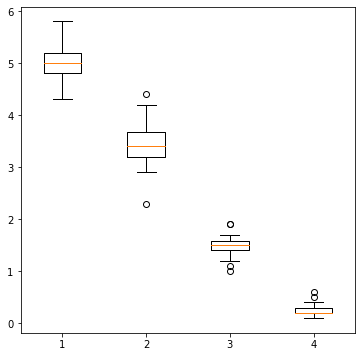

In [33]:
plt.figure(figsize=(6, 6))
plt.boxplot(setosa.T)
plt.show()

In [34]:
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

#### 2. 학습과 테스트 데이터로 분리

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=2022         # 기본은 3:1로 분리
)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [40]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2]), array([37, 38, 37]))

In [42]:
# y값을 균등하게 뽑으려면 stratify 옵션을 사용
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=2022
)

In [54]:
# test size 비율을 20%로 설정
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, test_size=0.2, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [45]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2]), array([40, 40, 40]))

#### 3. 학습

- 결정트리(Decision Tree)

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
# 모델생성 - 객체생성
dtc = DecisionTreeClassifier(random_state=2022)

In [49]:
# 모델의 hyper parameter
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2022,
 'splitter': 'best'}

In [56]:
# 학습(훈련)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2022)

#### 4. 예측

In [57]:
pred_dt = dtc.predict(X_test)

In [58]:
res = pd.DataFrame({'y':y_test, 'DT':pred_dt})
res.head()

,y,DT
0,0,0
1,1,1
2,1,2
3,2,2
4,0,0


#### 5. 평가

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_dt)

0.9

In [60]:
# 4, 5번(예측, 평가)을 한번에 수행
dtc.score(X_test, y_test)

0.9

#### Support Vector Machine(SVM)

In [61]:
# 3) 모델 생성 및 학습
from sklearn.svm import SVC
svc = SVC(random_state=2022)
svc.fit(X_train, y_train)

SVC(random_state=2022)

In [63]:
# 4) 예측
pred_sv = svc.predict(X_test)

In [64]:
# 5) 평가
accuracy_score(y_test, pred_sv)

0.9

#### Logistic Regression

In [65]:
# 3) 모델 생성 및 학습
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=2022, max_iter=500)
lrc.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=2022)

In [67]:
# 4) 예측
pred_lrc = lrc.predict(X_test)

In [76]:
# 5) 평가
accuracy_score(y_test, pred_lrc)

0.9333333333333333

In [68]:
# max_iter 값을 지정하지 않으면 오류가 발생
lrc2 = LogisticRegression(random_state=2022)
lrc2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=2022)

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
iris_scaled = MinMaxScaler().fit_transform(iris.data)

In [71]:
iris_scaled[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [72]:
X_train2, X_test2, _, _ = train_test_split(
    iris_scaled, iris.target, stratify = iris.target, test_size=0.2, random_state=2022
)

In [74]:
# X 데이터 scale 진행후 학습시 max_iter를 지정하지 않아도 오류가 발생하지 않음
lrc2.fit(X_train2, y_train)

LogisticRegression(random_state=2022)

#### 3가지 모델 비교

In [77]:
dtc.score(X_test, y_test), svc.score(X_test, y_test), lrc.score(X_test, y_test)

(0.9, 0.9, 0.9333333333333333)

In [78]:
res['SV'] = pred_sv
res['LR'] = pred_lrc
res.head()

,y,DT,SV,LR
0,0,0,0,0
1,1,1,1,1
2,1,2,1,1
3,2,2,2,2
4,0,0,0,0
